In [34]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [35]:
img_size = 150

In [38]:
# Building  a model with CNN
model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size = (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [39]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 256)      

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.25
)

In [22]:
train_gen = datagen.flow_from_directory(
    '../output/train',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

Found 7763 images belonging to 6 classes.


In [23]:
val_gen = datagen.flow_from_directory(
    '../output/val',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

Found 968 images belonging to 6 classes.


In [24]:
test_gen = datagen.flow_from_directory(
    '../output/test',
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical'
)

Found 976 images belonging to 6 classes.


In [25]:
class_names = train_gen.class_indices
class_names

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 3,
 'Tomato__Target_Spot': 4,
 'Tomato_healthy': 5}

In [122]:
class_name = list(train_gen.class_indices.keys())
n_classes = len(class_name)
class_name

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_healthy']

In [45]:
for image_batch, labels_batch in train_gen:
    print(image_batch[0])
    break

[[[0.627451   0.64705884 0.6313726 ]
  [0.627451   0.64705884 0.6313726 ]
  [0.627451   0.64705884 0.6313726 ]
  ...
  [0.59627706 0.5923555  0.58451235]
  [0.59946436 0.5955428  0.58769965]
  [0.6026517  0.59873015 0.590887  ]]

 [[0.627451   0.64705884 0.6313726 ]
  [0.627451   0.64705884 0.6313726 ]
  [0.627451   0.64705884 0.6313726 ]
  ...
  [0.5496363  0.5457147  0.53787154]
  [0.5445011  0.54057956 0.5327364 ]
  [0.539366   0.53544444 0.5276013 ]]

 [[0.627451   0.64705884 0.6313726 ]
  [0.627451   0.64705884 0.6313726 ]
  [0.627451   0.64705884 0.6313726 ]
  ...
  [0.5286237  0.52470213 0.516859  ]
  [0.52986324 0.52594167 0.51809853]
  [0.5311027  0.52718115 0.519338  ]]

 ...

 [[0.40677774 0.41854244 0.4381503 ]
  [0.40730897 0.41907367 0.4386815 ]
  [0.40784016 0.41960487 0.4392127 ]
  ...
  [0.34117648 0.34509805 0.3647059 ]
  [0.34117648 0.34509805 0.3647059 ]
  [0.34117648 0.34509805 0.3647059 ]]

 [[0.39711314 0.40887785 0.4284857 ]
  [0.3941029  0.4058676  0.42547545]


In [50]:
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
#     metrics=['accuracy']
# )

In [53]:
from keras import optimizers
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [54]:
history = model.fit(
    train_gen,
    steps_per_epoch=100,
    epochs=50,
    validation_data=val_gen,
    validation_steps=20,
)

Epoch 1/50
100/100 [==============================] - 76s 753ms/step - loss: 1.5895 - accuracy: 0.3366 - val_loss: 1.1179 - val_accuracy: 0.5609
Epoch 2/50
100/100 [==============================] - 74s 740ms/step - loss: 0.8871 - accuracy: 0.6472 - val_loss: 0.8539 - val_accuracy: 0.6875
Epoch 3/50
100/100 [==============================] - 77s 767ms/step - loss: 0.6726 - accuracy: 0.7380 - val_loss: 0.7743 - val_accuracy: 0.6875
Epoch 4/50
100/100 [==============================] - 81s 814ms/step - loss: 0.6071 - accuracy: 0.7606 - val_loss: 0.5690 - val_accuracy: 0.7750
Epoch 5/50
100/100 [==============================] - 79s 793ms/step - loss: 0.5131 - accuracy: 0.8086 - val_loss: 0.5896 - val_accuracy: 0.7797
Epoch 6/50
100/100 [==============================] - 80s 795ms/step - loss: 0.4503 - accuracy: 0.8363 - val_loss: 0.4149 - val_accuracy: 0.8516
Epoch 7/50
100/100 [==============================] - 78s 783ms/step - loss: 0.4537 - accuracy: 0.8290 - val_loss: 0.4233 - val_ac

In [65]:
scores = model.evaluate(test_gen)

31/31 [==============================] - 8s 252ms/step - loss: 0.3107 - accuracy: 0.9293


In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(1, len(acc) + 1)
epoch

range(1, 51)

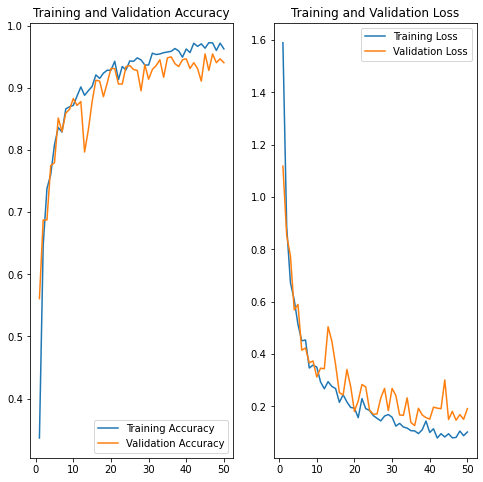

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch, acc, label='Training Accuracy')
plt.plot(epoch, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch, loss, label='Training Loss')
plt.plot(epoch, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [66]:
model.save('../saved_models/tomato-models2.h5')

[0. 0. 0. 0. 1. 0.]
predicted label: Tomato__Target_Spot


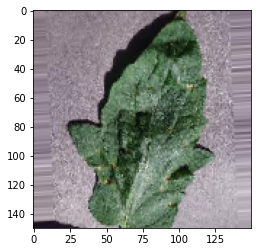

In [139]:
import numpy as np

for image_batch, label_batch in test_gen:
    first_image = image_batch[0]
    first_label = label_batch[0]
    
    print(first_label)
#     print(type(first_label))
    
#     print("first image to predict")
    plt.imshow(first_image)
#     print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])
    
    break

In [126]:
['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_healthy']

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_healthy']

In [142]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

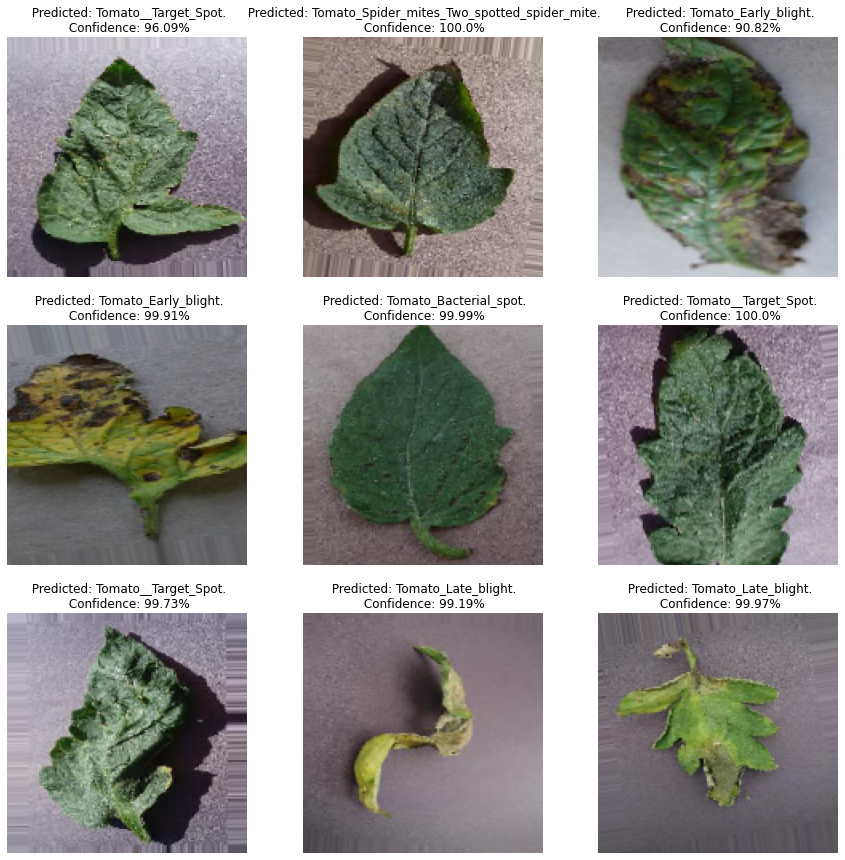

In [145]:
plt.figure(figsize=(15, 15))
for images, labels in test_gen:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[i]
        print(first_label)
        
        plt.title(f" Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break